In [ ]:
!wget https://aka.ms/AirSimTutorialDataset

--2022-02-12 08:51:45--  https://aka.ms/AirSimTutorialDataset
Resolving aka.ms (aka.ms)... 23.55.19.188
Connecting to aka.ms (aka.ms)|23.55.19.188|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://airsimtutorialdataset.blob.core.windows.net/e2edl/EndToEndLearningRawData.7z [following]
--2022-02-12 08:51:46--  https://airsimtutorialdataset.blob.core.windows.net/e2edl/EndToEndLearningRawData.7z
Resolving airsimtutorialdataset.blob.core.windows.net (airsimtutorialdataset.blob.core.windows.net)... 20.150.38.164
Connecting to airsimtutorialdataset.blob.core.windows.net (airsimtutorialdataset.blob.core.windows.net)|20.150.38.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3425170874 (3.2G) [application/octet-stream]
Saving to: ‘AirSimTutorialDataset’

AirSimTutorialDatas 100%[===================>]   3.19G  33.4MB/s    in 3m 40s  

2022-02-12 08:55:26 (14.8 MB/s) - ‘AirSimTutorialDataset’ saved [3425170874/34251708

In [ ]:
# !cp AirSimTutorialDataset /content/drive/Shareddrives/Sam\'s\ Drive

In [ ]:
!file AirSimTutorialDataset

/bin/bash: file: command not found


In [ ]:
!mkdir AirSimDataset

In [ ]:
!7za x AirSimTutorialDataset -o./AirSimDataset -y


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 3425170874 bytes (3267 MiB)

Extracting archive: AirSimTutorialDataset
--
Path = AirSimTutorialDataset
Type = 7z
Physical Size = 3425170874
Headers Size = 452524
Method = LZMA:24
Solid = +
Blocks = 2

  0%      0% - data_raw/normal_1/images/img_0.png                                           0% 57 - data_raw/normal_6/images/img_1002.png                                                 0% 114 - data_raw/swerve_1/images/img_1009.png                                                

In [ ]:
!rm AirSimTutorialDataset

In [ ]:
# !rm -rf AirSimDataset

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
# import Cooking
import random

# << Point this to the directory containing the raw data >>
RAW_DATA_DIR = './AirSimDataset/data_raw/'

# << Point this to the desired output directory for the cooked (.h5) data >>
COOKED_DATA_DIR = './data_cooked/'

# The folders to search for data under RAW_DATA_DIR
# For example, the first folder searched will be RAW_DATA_DIR/normal_1
DATA_FOLDERS = ['normal_1', 'normal_2', 'normal_3', 'normal_4', 'normal_5', 'normal_6', 'swerve_1', 'swerve_2', 'swerve_3']

# The size of the figures in this notebook
FIGURE_SIZE = (10,10)

In [ ]:
sample_tsv_path = os.path.join(RAW_DATA_DIR, 'normal_4/airsim_rec.txt')
sample_tsv = pd.read_csv(sample_tsv_path, sep='\t')
sample_tsv.head()

,Timestamp,Speed (kmph),Throttle,Steering,Brake,Gear,ImageName
0,96162631,0,0.0,0.0,0.0,N,img_0.png
1,96162655,0,0.0,0.0,0.0,N,img_1.png
2,96162703,0,0.0,0.0,0.0,N,img_2.png
3,96162751,0,0.0,0.0,0.0,N,img_3.png
4,96162799,0,0.0,0.0,0.0,N,img_4.png


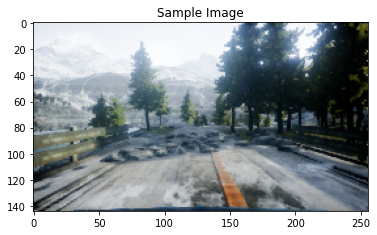

In [ ]:
sample_image_path = os.path.join(RAW_DATA_DIR, 'normal_4/images/img_0.png')
sample_image = Image.open(sample_image_path)
plt.title('Sample Image')
plt.imshow(sample_image)
plt.show()

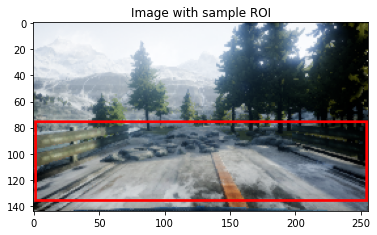

In [ ]:
sample_image_roi = sample_image.copy()

fillcolor=(255,0,0)
draw = ImageDraw.Draw(sample_image_roi)
points = [(1,76), (1,135), (255,135), (255,76)]
for i in range(0, len(points), 1):
    draw.line([points[i], points[(i+1)%len(points)]], fill=fillcolor, width=2)
del draw

plt.title('Image with sample ROI')
plt.imshow(sample_image_roi)
plt.show()

In [ ]:
full_path_raw_folders = [os.path.join(RAW_DATA_DIR, f) for f in DATA_FOLDERS]

dataframes = []
for folder in full_path_raw_folders:
    current_dataframe = pd.read_csv(os.path.join(folder, 'airsim_rec.txt'), sep='\t')
    current_dataframe['Folder'] = folder
    dataframes.append(current_dataframe)
    
dataset = pd.concat(dataframes, axis=0)

print('Number of data points: {0}'.format(dataset.shape[0]))

dataset.head()

Number of data points: 46738


,Timestamp,Speed (kmph),Throttle,Steering,Brake,Gear,ImageName,Folder
0,93683464,0,0.0,0.000000,0.0,N,img_0.png,./AirSimDataset/data_raw/normal_1
1,93689595,0,0.0,0.000000,0.0,N,img_1.png,./AirSimDataset/data_raw/normal_1
2,93689624,0,0.0,-0.035522,0.0,N,img_2.png,./AirSimDataset/data_raw/normal_1
3,93689624,0,0.0,-0.035522,0.0,N,img_3.png,./AirSimDataset/data_raw/normal_1
4,93689624,0,0.0,-0.035522,0.0,N,img_4.png,./AirSimDataset/data_raw/normal_1


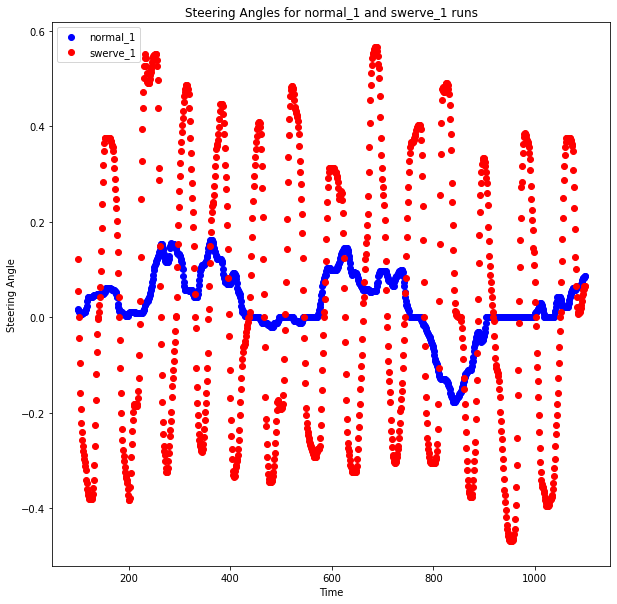

In [ ]:
min_index = 100
max_index = 1100
steering_angles_normal_1 = dataset[dataset['Folder'].apply(lambda v: 'normal_1' in v)]['Steering'][min_index:max_index]
steering_angles_swerve_1 = dataset[dataset['Folder'].apply(lambda v: 'swerve_1' in v)]['Steering'][min_index:max_index]

plot_index = [i for i in range(min_index, max_index, 1)]

fig = plt.figure(figsize=FIGURE_SIZE)
ax1 = fig.add_subplot(111)

ax1.scatter(plot_index, steering_angles_normal_1, c='b', marker='o', label='normal_1')
ax1.scatter(plot_index, steering_angles_swerve_1, c='r', marker='o', label='swerve_1')
plt.legend(loc='upper left');
plt.title('Steering Angles for normal_1 and swerve_1 runs')
plt.xlabel('Time')
plt.ylabel('Steering Angle')
plt.show()

In [ ]:
def checkAndCreateDir(full_path):
    if not os.path.exists(os.path.dirname(full_path)):
        try:
            os.makedirs(os.path.dirname(full_path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

In [ ]:
def readImagesFromPath(image_names):
    returnValue = []
    for image_name in image_names:
        im = Image.open(image_name)
        imArr = np.asarray(im)
        
        #Remove alpha channel if exists
        if len(imArr.shape) == 3 and imArr.shape[2] == 4:
            if (np.all(imArr[:, :, 3] == imArr[0, 0, 3])):
                imArr = imArr[:,:,0:3]
        if len(imArr.shape) != 3 or imArr.shape[2] != 3:
            print('Error: Image', image_name, 'is not RGB.')
            sys.exit()            

        returnIm = np.asarray(imArr)

        returnValue.append(returnIm)
    return returnValue

In [ ]:
def splitTrainValidationAndTestData(all_data_mappings, split_ratio=(0.7, 0.2, 0.1)):
    train_split = int(len(all_data_mappings) * split_ratio[0])
    val_split = train_split + int(len(all_data_mappings) * split_ratio[1])

    train_data_mappings = all_data_mappings[0:train_split]
    validation_data_mappings = all_data_mappings[train_split:val_split]
    test_data_mappings = all_data_mappings[val_split:]

    return [train_data_mappings, validation_data_mappings, test_data_mappings]

In [ ]:
def generateDataMapAirSim(folders):
    all_mappings = {}
    for folder in folders:
        print('Reading data from {0}...'.format(folder))
        current_df = pd.read_csv(os.path.join(folder, 'airsim_rec.txt'), sep='\t')
        
        for i in range(1, current_df.shape[0] - 1, 1):
            previous_state = list(current_df.iloc[i-1][['Steering', 'Throttle', 'Brake', 'Speed (kmph)']])
            current_label = list((current_df.iloc[i][['Steering']] + current_df.iloc[i-1][['Steering']] + current_df.iloc[i+1][['Steering']]) / 3.0)
            
            image_filepath = os.path.join(os.path.join(folder, 'images'), current_df.iloc[i]['ImageName']).replace('\\', '/')
            
            if (image_filepath in all_mappings):
                print('Error: attempting to add image {0} twice.'.format(image_filepath))
            
            all_mappings[image_filepath] = (current_label, previous_state)
    
    mappings = [(key, all_mappings[key]) for key in all_mappings]
    random.shuffle(mappings)
    
    return mappings

In [ ]:
def generatorForH5py(data_mappings, chunk_size=32):
    for chunk_id in range(0, len(data_mappings), chunk_size):

        data_chunk = data_mappings[chunk_id:chunk_id + chunk_size]
        if (len(data_chunk) == chunk_size):
            image_names_chunk = [a for (a, b) in data_chunk]
            labels_chunk = np.asarray([b[0] for (a, b) in data_chunk])
            previous_state_chunk = np.asarray([b[1] for (a, b) in data_chunk])
            
            yield (image_names_chunk, labels_chunk.astype(float), previous_state_chunk.astype(float))

In [ ]:
def saveH5pyData(data_mappings, target_file_path):
    chunk_size = 32
    gen = generatorForH5py(data_mappings,chunk_size)

    image_names_chunk, labels_chunk, previous_state_chunk = next(gen)
    images_chunk = np.asarray(readImagesFromPath(image_names_chunk))
    row_count = images_chunk.shape[0]

    checkAndCreateDir(target_file_path)
    with h5py.File(target_file_path, 'w') as f:
        images_chunk_maxshape = (None,) + images_chunk.shape[1:]
        labels_chunk_maxshape = (None,) + labels_chunk.shape[1:]
        previous_state_maxshape = (None,) + previous_state_chunk.shape[1:]

        dset_images = f.create_dataset('image', shape=images_chunk.shape, maxshape=images_chunk_maxshape,
                                chunks=images_chunk.shape, dtype=images_chunk.dtype)

        dset_labels = f.create_dataset('label', shape=labels_chunk.shape, maxshape=labels_chunk_maxshape,
                                       chunks=labels_chunk.shape, dtype=labels_chunk.dtype)
        
        dset_previous_state = f.create_dataset('previous_state', shape=previous_state_chunk.shape, maxshape=previous_state_maxshape,
                                       chunks=previous_state_chunk.shape, dtype=previous_state_chunk.dtype)
                                       
        dset_images[:] = images_chunk
        dset_labels[:] = labels_chunk
        dset_previous_state[:] = previous_state_chunk

        for image_names_chunk, label_chunk, previous_state_chunk in gen:
            image_chunk = np.asarray(readImagesFromPath(image_names_chunk))
            
            dset_images.resize(row_count + image_chunk.shape[0], axis=0)
            dset_labels.resize(row_count + label_chunk.shape[0], axis=0)
            dset_previous_state.resize(row_count + previous_state_chunk.shape[0], axis=0)

            dset_images[row_count:] = image_chunk
            dset_labels[row_count:] = label_chunk
            dset_previous_state[row_count:] = previous_state_chunk

            row_count += image_chunk.shape[0]

In [ ]:
def cook(folders, output_directory, train_eval_test_split):
    output_files = [os.path.join(output_directory, f) for f in ['train.h5', 'eval.h5', 'test.h5']]
    all_data_mappings = generateDataMapAirSim(folders)
    
    split_mappings = splitTrainValidationAndTestData(all_data_mappings, split_ratio=train_eval_test_split)
    
    for i in range(0, len(split_mappings), 1):
        print('Processing {0}...'.format(output_files[i]))
        saveH5pyData(split_mappings[i], output_files[i])
        print('Finished saving {0}.'.format(output_files[i]))

In [ ]:
train_eval_test_split = [0.7, 0.2, 0.1]
full_path_raw_folders = [os.path.join(RAW_DATA_DIR, f) for f in DATA_FOLDERS]
cook(full_path_raw_folders, COOKED_DATA_DIR, train_eval_test_split)

Reading data from ./AirSimDataset/data_raw/normal_1...
Reading data from ./AirSimDataset/data_raw/normal_2...
Reading data from ./AirSimDataset/data_raw/normal_3...
Reading data from ./AirSimDataset/data_raw/normal_4...
Reading data from ./AirSimDataset/data_raw/normal_5...
Reading data from ./AirSimDataset/data_raw/normal_6...
Reading data from ./AirSimDataset/data_raw/swerve_1...
Reading data from ./AirSimDataset/data_raw/swerve_2...
Reading data from ./AirSimDataset/data_raw/swerve_3...
Processing ./data_cooked/train.h5...
Finished saving ./data_cooked/train.h5.
Processing ./data_cooked/eval.h5...
Finished saving ./data_cooked/eval.h5.
Processing ./data_cooked/test.h5...
Finished saving ./data_cooked/test.h5.


In [ ]:
!cp -r data_cooked/ /content/drive/Shareddrives/Sam\'s\ Drive

cp: cannot create directory "/content/drive/Shareddrives/Sam's Drive": No such file or directory


## Train

In [ ]:
!pip install q keras==2.1.2
!pip install tqdm

     |████████████████████████████████| 304 kB 8.7 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.1.2 which is incompatible.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Lambda, Input, concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import ELU
from tensorflow.keras.optimizers import Adam, SGD, Adamax, Nadam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, CSVLogger, EarlyStopping
import keras.backend as K
from keras.preprocessing import image

# from keras_tqdm import TQDMNotebookCallback
from tqdm.keras import TqdmCallback

import json
import os
import numpy as np
import pandas as pd

import h5py
from PIL import Image, ImageDraw
import math
import matplotlib.pyplot as plt

# << The directory containing the cooked data from the previous step >>
COOKED_DATA_DIR = 'data_cooked/'

# << The directory in which the model output will be placed >>
MODEL_OUTPUT_DIR = 'model'

In [ ]:
train_dataset = h5py.File(os.path.join(COOKED_DATA_DIR, 'train.h5'), 'r')
eval_dataset = h5py.File(os.path.join(COOKED_DATA_DIR, 'eval.h5'), 'r')
test_dataset = h5py.File(os.path.join(COOKED_DATA_DIR, 'test.h5'), 'r')

num_train_examples = train_dataset['image'].shape[0]
num_eval_examples = eval_dataset['image'].shape[0]
num_test_examples = test_dataset['image'].shape[0]

batch_size=32

In [ ]:
import tensorflow
from keras.preprocessing import image
import numpy as np
import keras.backend as K
import os
import cv2

class DriveDataGenerator(tensorflow.keras.preprocessing.image.ImageDataGenerator):
    def __init__(self,
                 featurewise_center=False,
                 samplewise_center=False,
                 featurewise_std_normalization=False,
                 samplewise_std_normalization=False,
                 zca_whitening=False,
                 zca_epsilon=1e-6,
                 rotation_range=0.,
                 width_shift_range=0.,
                 height_shift_range=0.,
                 brightness_range=1.0,
                 shear_range=0.,
                 zoom_range=0.,
                 channel_shift_range=0.,
                 fill_mode='nearest',
                 cval=0.,
                 horizontal_flip=False,
                 vertical_flip=False,
                 rescale=None,
                 preprocessing_function=None,
                 data_format=None):   
        
        super(DriveDataGenerator, self).__init__(featurewise_center,
                 samplewise_center,
                 featurewise_std_normalization,
                 samplewise_std_normalization,
                 zca_whitening,
                 zca_epsilon,
                 rotation_range,
                 width_shift_range,
                 height_shift_range,
                 brightness_range,
                 shear_range,
                 zoom_range,
                 channel_shift_range,
                 fill_mode,
                 cval,
                 horizontal_flip,
                 vertical_flip,
                 rescale,
                 preprocessing_function,
                 data_format)
        self.brightness_range = brightness_range

    def flow(self, x_images, x_prev_states = None, y=None, batch_size=32, shuffle=True, seed=None,
             save_to_dir=None, save_prefix='', save_format='png', zero_drop_percentage=0.5, roi=None):
        return DriveIterator(
            x_images, x_prev_states, y, self,
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            data_format=self.data_format,
            save_to_dir=save_to_dir,
            save_prefix=save_prefix,
            save_format=save_format,
            zero_drop_percentage=zero_drop_percentage,
            roi=roi)
    
    def random_transform_with_states(self, x, seed=None):
        """Randomly augment a single image tensor.
        # Arguments
            x: 3D tensor, single image.
            seed: random seed.
        # Returns
            A tuple. 0 -> randomly transformed version of the input (same shape). 1 -> true if image was horizontally flipped, false otherwise
        """
        # x is a single image, so it doesn't have image number at index 0
        img_row_axis = self.row_axis
        img_col_axis = self.col_axis
        img_channel_axis = self.channel_axis

        is_image_horizontally_flipped = False

        # use composition of homographies
        # to generate final transform that needs to be applied
        if self.rotation_range:
            theta = np.pi / 180 * np.random.uniform(-self.rotation_range, self.rotation_range)
        else:
            theta = 0

        if self.height_shift_range:
            tx = np.random.uniform(-self.height_shift_range, self.height_shift_range) * x.shape[img_row_axis]
        else:
            tx = 0

        if self.width_shift_range:
            ty = np.random.uniform(-self.width_shift_range, self.width_shift_range) * x.shape[img_col_axis]
        else:
            ty = 0

        if self.shear_range:
            shear = np.random.uniform(-self.shear_range, self.shear_range)
        else:
            shear = 0

        if self.zoom_range[0] == 1 and self.zoom_range[1] == 1:
            zx, zy = 1, 1
        else:
            zx, zy = np.random.uniform(self.zoom_range[0], self.zoom_range[1], 2)

        transform_matrix = None
        if theta != 0:
            rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                        [np.sin(theta), np.cos(theta), 0],
                                        [0, 0, 1]])
            transform_matrix = rotation_matrix

        if tx != 0 or ty != 0:
            shift_matrix = np.array([[1, 0, tx],
                                     [0, 1, ty],
                                     [0, 0, 1]])
            transform_matrix = shift_matrix if transform_matrix is None else np.dot(transform_matrix, shift_matrix)

        if shear != 0:
            shear_matrix = np.array([[1, -np.sin(shear), 0],
                                    [0, np.cos(shear), 0],
                                    [0, 0, 1]])
            transform_matrix = shear_matrix if transform_matrix is None else np.dot(transform_matrix, shear_matrix)

        if zx != 1 or zy != 1:
            zoom_matrix = np.array([[zx, 0, 0],
                                    [0, zy, 0],
                                    [0, 0, 1]])
            transform_matrix = zoom_matrix if transform_matrix is None else np.dot(transform_matrix, zoom_matrix)

        if transform_matrix is not None:
            h, w = x.shape[img_row_axis], x.shape[img_col_axis]
            transform_matrix = image.transform_matrix_offset_center(transform_matrix, h, w)
            x = image.apply_transform(x, transform_matrix, img_channel_axis,
                                fill_mode=self.fill_mode, cval=self.cval)

        if self.channel_shift_range != 0:
            x = image.random_channel_shift(x,
                                     self.channel_shift_range,
                                     img_channel_axis)
        if self.horizontal_flip:
            if np.random.random() < 0.5:
                x = image.flip_axis(x, img_col_axis)
                
                is_image_horizontally_flipped = True

        if self.vertical_flip:
            if np.random.random() < 0.5:
                x = image.flip_axis(x, img_row_axis)
                
        if self.brightness_range != 0:
            random_bright = np.random.uniform(low = 1.0-self.brightness_range[0], high=1.0+self.brightness_range[1])
            
            #TODO: Write this as an apply to push operations into C for performance
            img = cv2.cvtColor(x, cv2.COLOR_RGB2HSV)
            img[:, :, 2] = np.clip(img[:, :, 2] * random_bright, 0, 255)
            x = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

        return (x, is_image_horizontally_flipped)

class DriveIterator(image.Iterator):
    """Iterator yielding data from a Numpy array.

    # Arguments
        x: Numpy array of input data.
        y: Numpy array of targets data.
        image_data_generator: Instance of `ImageDataGenerator`
            to use for random transformations and normalization.
        batch_size: Integer, size of a batch.
        shuffle: Boolean, whether to shuffle the data between epochs.
        seed: Random seed for data shuffling.
        data_format: String, one of `channels_first`, `channels_last`.
        save_to_dir: Optional directory where to save the pictures
            being yielded, in a viewable format. This is useful
            for visualizing the random transformations being
            applied, for debugging purposes.
        save_prefix: String prefix to use for saving sample
            images (if `save_to_dir` is set).
        save_format: Format to use for saving sample images
            (if `save_to_dir` is set).
    """

    def __init__(self, x_images, x_prev_states, y, image_data_generator,
                 batch_size=32, shuffle=False, seed=None,
                 data_format=None,
                 save_to_dir=None, save_prefix='', save_format='png', zero_drop_percentage = 0.5, roi = None):
        if y is not None and len(x_images) != len(y):
            raise ValueError('X (images tensor) and y (labels) '
                             'should have the same length. '
                             'Found: X.shape = %s, y.shape = %s' %
                             (np.asarray(x_images).shape, np.asarray(y).shape))

        if data_format is None:
            data_format = K.image_data_format()
        
        self.x_images = x_images
        
        self.zero_drop_percentage = zero_drop_percentage
        self.roi = roi
        
        if self.x_images.ndim != 4:
            raise ValueError('Input data in `NumpyArrayIterator` '
                             'should ave rank 4. You passed an array '
                             'with shape', self.x_images.shape)
        channels_axis = 3 if data_format == 'channels_last' else 1
        if self.x_images.shape[channels_axis] not in {1, 3, 4}:
            raise ValueError('NumpyArrayIterator is set to use the '
                             'data format convention "' + data_format + '" '
                             '(channels on axis ' + str(channels_axis) + '), i.e. expected '
                             'either 1, 3 or 4 channels on axis ' + str(channels_axis) + '. '
                             'However, it was passed an array with shape ' + str(self.x_images.shape) +
                             ' (' + str(self.x_images.shape[channels_axis]) + ' channels).')
        if x_prev_states is not None:
            self.x_prev_states = x_prev_states
        else:
            self.x_prev_states = None

        if y is not None:
            self.y = y
        else:
            self.y = None
        self.image_data_generator = image_data_generator
        self.data_format = data_format
        self.save_to_dir = save_to_dir
        self.save_prefix = save_prefix
        self.save_format = save_format
        self.batch_size = batch_size
        super(DriveIterator, self).__init__(x_images.shape[0], batch_size, shuffle, seed)

    def next(self):
        """For python 2.x.

        # Returns
            The next batch.
        """
        # Keeps under lock only the mechanism which advances
        # the indexing of each batch.
        with self.lock:
            index_array = next(self.index_generator)
        # The transformation of images is not under thread lock
        # so it can be done in parallel

        return self.__get_indexes(index_array)

    def __get_indexes(self, index_array):
        index_array = sorted(index_array)
        if self.x_prev_states is not None:
            batch_x_images = np.zeros(tuple([self.batch_size]+ list(self.x_images.shape)[1:]),
                                      dtype=K.floatx())
            batch_x_prev_states = np.zeros(tuple([self.batch_size]+list(self.x_prev_states.shape)[1:]), dtype=K.floatx())
        else:
            batch_x_images = np.zeros(tuple([self.batch_size] + list(self.x_images.shape)[1:]), dtype=K.floatx())

        if self.roi is not None:
            batch_x_images = batch_x_images[:, self.roi[0]:self.roi[1], self.roi[2]:self.roi[3], :]
            
        used_indexes = []
        is_horiz_flipped = []
        for i, j in enumerate(index_array):
            x_images = self.x_images[j]
            
            if self.roi is not None:
                x_images = x_images[self.roi[0]:self.roi[1], self.roi[2]:self.roi[3], :]
            
            transformed = self.image_data_generator.random_transform_with_states(x_images.astype(K.floatx()))
            x_images = transformed[0]
            is_horiz_flipped.append(transformed[1])
            x_images = self.image_data_generator.standardize(x_images)
            batch_x_images[i] = x_images

            if self.x_prev_states is not None:
                x_prev_states = self.x_prev_states[j]
                
                if (transformed[1]):
                    x_prev_states[0] *= -1.0
                
                batch_x_prev_states[i] = x_prev_states
            
            used_indexes.append(j)

        if self.x_prev_states is not None:
            batch_x = [np.asarray(batch_x_images), np.asarray(batch_x_prev_states)]
        else:
            batch_x = np.asarray(batch_x_images)
            
        if self.save_to_dir:
            for i in range(0, self.batch_size, 1):
                hash = np.random.randint(1e4)
               
                img = image.array_to_img(batch_x_images[i], self.data_format, scale=True)
                fname = '{prefix}_{index}_{hash}.{format}'.format(prefix=self.save_prefix,
                                                                        index=1,
                                                                        hash=hash,
                                                                        format=self.save_format)
                img.save(os.path.join(self.save_to_dir, fname))

        batch_y = self.y[list(sorted(used_indexes))]
        idx = []
        for i in range(0, len(is_horiz_flipped), 1):
            if batch_y.shape[1] == 1:
                if (is_horiz_flipped[i]):
                    batch_y[i] *= -1
                    
                if (np.isclose(batch_y[i], 0)):
                    if (np.random.uniform(low=0, high=1) > self.zero_drop_percentage):
                        idx.append(True)
                    else:
                        idx.append(False)
                else:
                    idx.append(True)
            else:
                if (batch_y[i][int(len(batch_y[i])/2)] == 1):
                    if (np.random.uniform(low=0, high=1) > self.zero_drop_percentage):
                        idx.append(True)
                    else:
                        idx.append(False)
                else:
                    idx.append(True)
                
                if (is_horiz_flipped[i]):
                    batch_y[i] = batch_y[i][::-1]

        batch_y = batch_y[idx]
        batch_x[0] = batch_x[0][idx]
        batch_x[1] = batch_x[1][idx]
        
        return batch_x, batch_y
        
    def _get_batches_of_transformed_samples(self, index_array):
        return self.__get_indexes(index_array)
        

In [ ]:
data_generator = DriveDataGenerator(rescale=1./255., horizontal_flip=True, brightness_range=[0.4, 0.4])
train_generator = data_generator.flow(train_dataset['image'], train_dataset['previous_state'], train_dataset['label'], batch_size=batch_size, zero_drop_percentage=0.95, roi=[76,135,0,255])
eval_generator = data_generator.flow(eval_dataset['image'], eval_dataset['previous_state'], eval_dataset['label'], batch_size=batch_size, zero_drop_percentage=0.95, roi=[76,135,0,255])    

Actual Steering Angle = [0.228614]


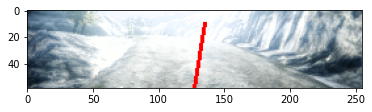

Actual Steering Angle = [-0.12004967]


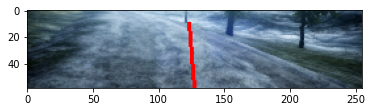

Actual Steering Angle = [-0.11395967]


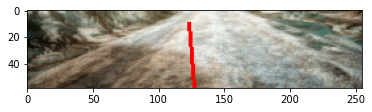

In [ ]:
def draw_image_with_label(img, label, prediction=None):
    theta = label * 0.69 #Steering range for the car is +- 40 degrees -> 0.69 radians
    line_length = 50
    line_thickness = 3
    label_line_color = (255, 0, 0)
    prediction_line_color = (0, 0, 255)
    pil_image = image.array_to_img(img, K.image_data_format(), scale=True)
    print('Actual Steering Angle = {0}'.format(label))
    draw_image = pil_image.copy()
    image_draw = ImageDraw.Draw(draw_image)
    first_point = (int(img.shape[1]/2),img.shape[0])
    second_point = (int((img.shape[1]/2) + (line_length * math.sin(theta))), int(img.shape[0] - (line_length * math.cos(theta))))
    image_draw.line([first_point, second_point], fill=label_line_color, width=line_thickness)
    
    if (prediction is not None):
        print('Predicted Steering Angle = {0}'.format(prediction))
        print('L1 Error: {0}'.format(abs(prediction-label)))
        theta = prediction * 0.69
        second_point = (int((img.shape[1]/2) + (line_length * math.sin(theta))), int(img.shape[0] - (line_length * math.cos(theta))))
        image_draw.line([first_point, second_point], fill=prediction_line_color, width=line_thickness)
    
    del image_draw
    plt.imshow(draw_image)
    plt.show()

[sample_batch_train_data, sample_batch_test_data] = next(train_generator)
for i in range(0, 3, 1):
    draw_image_with_label(sample_batch_train_data[0][i], sample_batch_test_data[i])

In [ ]:
image_input_shape = sample_batch_train_data[0].shape[1:]
state_input_shape = sample_batch_train_data[1].shape[1:]
activation = 'relu'

#Create the convolutional stacks
pic_input = Input(shape=image_input_shape)

img_stack = Conv2D(16, (3, 3), name="convolution0", padding='same', activation=activation)(pic_input)
img_stack = MaxPooling2D(pool_size=(2,2))(img_stack)
img_stack = Conv2D(32, (3, 3), activation=activation, padding='same', name='convolution1')(img_stack)
img_stack = MaxPooling2D(pool_size=(2, 2))(img_stack)
img_stack = Conv2D(32, (3, 3), activation=activation, padding='same', name='convolution2')(img_stack)
img_stack = MaxPooling2D(pool_size=(2, 2))(img_stack)
img_stack = Flatten()(img_stack)
img_stack = Dropout(0.2)(img_stack)

#Inject the state input
state_input = Input(shape=state_input_shape)
merged = concatenate([img_stack, state_input])

# Add a few dense layers to finish the model
merged = Dense(64, activation=activation, name='dense0')(merged)
merged = Dropout(0.2)(merged)
merged = Dense(10, activation=activation, name='dense2')(merged)
merged = Dropout(0.2)(merged)
merged = Dense(1, name='output')(merged)

adam = Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model = Model(inputs=[pic_input, state_input], outputs=merged)
model.compile(optimizer=adam, loss='mse')

In [ ]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 59, 255, 3)] 0                                            
__________________________________________________________________________________________________
convolution0 (Conv2D)           (None, 59, 255, 16)  448         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 29, 127, 16)  0           convolution0[0][0]               
__________________________________________________________________________________________________
convolution1 (Conv2D)           (None, 29, 127, 32)  4640        max_pooling2d_3[0][0]            
____________________________________________________________________________________________

In [ ]:
plateau_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)
checkpoint_filepath = os.path.join(MODEL_OUTPUT_DIR, 'models', '{0}_model.{1}-{2}.h5'.format('model', '{epoch:02d}', '{val_loss:.7f}'))
checkAndCreateDir(checkpoint_filepath)
checkpoint_callback = ModelCheckpoint(checkpoint_filepath, save_best_only=True, verbose=1)
csv_callback = CSVLogger(os.path.join(MODEL_OUTPUT_DIR, 'training_log.csv'))
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

tqdmcb = TqdmCallback()
tqdmcb.on_train_batch_begin = tqdmcb.on_batch_begin
tqdmcb.on_train_batch_end = tqdmcb.on_batch_end
tqdmcb.on_test_begin = tqdmcb.on_batch_end
tqdmcb.on_test_begin = lambda y: None
tqdmcb.on_test_end = lambda y: None
tqdmcb.on_test_batch_begin = lambda x, y: None
tqdmcb.on_test_batch_end = lambda x, y: None

callbacks=[plateau_callback, csv_callback, checkpoint_callback, early_stopping_callback, tqdmcb]

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=num_train_examples//batch_size, epochs=500, callbacks=callbacks,\
                   validation_data=eval_generator, validation_steps=num_eval_examples//batch_size, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
1021/1021 - 63s - loss: 0.0239 - val_loss: 0.0227

Epoch 00001: val_loss improved from inf to 0.02272, saving model to model/models/model_model.01-0.0227193.h5
Epoch 2/500
1021/1021 - 52s - loss: 0.0227 - val_loss: 0.0228

Epoch 00002: val_loss did not improve from 0.02272
Epoch 3/500
1021/1021 - 50s - loss: 0.0226 - val_loss: 0.0216

Epoch 00003: val_loss improved from 0.02272 to 0.02156, saving model to model/models/model_model.03-0.0215584.h5
Epoch 4/500
1021/1021 - 50s - loss: 0.0174 - val_loss: 0.0073

Epoch 00004: val_loss improved from 0.02156 to 0.00729, saving model to model/models/model_model.04-0.0072930.h5
Epoch 5/500
1021/1021 - 49s - loss: 0.0075 - val_loss: 0.0030

Epoch 00005: val_loss improved from 0.00729 to 0.00297, saving model to model/models/model_model.05-0.0029740.h5
Epoch 6/500
1021/1021 - 49s - loss: 0.0046 - val_loss: 0.0018

Epoch 00006: val_loss improved from 0.00297 to 0.00179, saving model to model/models/model_model.06-0.0017945.h5
Epoch 7/50

In [ ]:
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


Actual Steering Angle = [0.18685133]
Predicted Steering Angle = [0.173377]
L1 Error: [0.01347433]


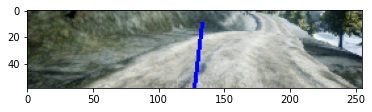

Actual Steering Angle = [-0.46923833]
Predicted Steering Angle = [-0.4370782]
L1 Error: [0.03216013]


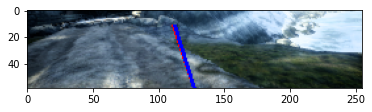

Actual Steering Angle = [-0.00065433]
Predicted Steering Angle = [0.00227973]
L1 Error: [0.00293407]


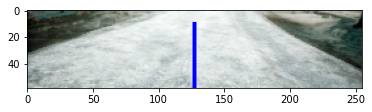

In [ ]:
[sample_batch_train_data, sample_batch_test_data] = next(train_generator)
predictions = model.predict([sample_batch_train_data[0], sample_batch_train_data[1]])
for i in range(0, 3, 1):
    draw_image_with_label(sample_batch_train_data[0][i], sample_batch_test_data[i], predictions[i])

In [ ]:
# !cp -r ./model /content/drive/Shareddrives/Sam\'s\ Drive